# Loading Libraries

In [1]:
#structures
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D

#get model duration
import time
from datetime import date

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-application/loan_application_dataset.csv


# Loading a dataset

In [2]:
#load train dataset
loan_data = '../input/loan-application/loan_application_dataset.csv'
df = pd.read_csv(loan_data)
df.shape

(346, 10)

# Exploring a dataset

In [3]:
df.columns #finding name of columns of the dataset

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [4]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
#checking datatypes of features
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [6]:
#for full summary with every column & row
df.describe(include = "all")

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


# Data Pre-processing

## Identifying & handling missing values

### Dropping rows with NaN values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


Based on the output, we can see all the data points are clean from NaN values. <br>
Below is another way to see this.

In [8]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

Printing out summary by each feature on NaN values.

In [9]:
#output missing data
missing_data = df.isnull()
missing_data.sample(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
197,False,False,False,False,False,False,False,False,False,False
85,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False
56,False,False,False,False,False,False,False,False,False,False
84,False,False,False,False,False,False,False,False,False,False
59,False,False,False,False,False,False,False,False,False,False
292,False,False,False,False,False,False,False,False,False,False


In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Unnamed: 0
False    346
Name: Unnamed: 0, dtype: int64

Unnamed: 0.1
False    346
Name: Unnamed: 0.1, dtype: int64

loan_status
False    346
Name: loan_status, dtype: int64

Principal
False    346
Name: Principal, dtype: int64

terms
False    346
Name: terms, dtype: int64

effective_date
False    346
Name: effective_date, dtype: int64

due_date
False    346
Name: due_date, dtype: int64

age
False    346
Name: age, dtype: int64

education
False    346
Name: education, dtype: int64

Gender
False    346
Name: Gender, dtype: int64



Using heat-map is also another way to check for NaN value data points

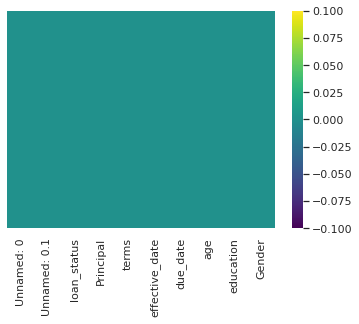

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

## Finding a target value

In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


Based on our use case, "loan status" would be the target value.

### Re-arranging features

In [13]:
df = df[['Unnamed: 0', 'Unnamed: 0.1', 'Principal', 'terms', 'effective_date', 'due_date', 'age', 'education', 'Gender', 'loan_status']]

In [14]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,effective_date,due_date,age,education,Gender,loan_status
0,0,0,1000,30,9/8/2016,10/7/2016,45,High School or Below,male,PAIDOFF
1,2,2,1000,30,9/8/2016,10/7/2016,33,Bechalor,female,PAIDOFF
2,3,3,1000,15,9/8/2016,9/22/2016,27,college,male,PAIDOFF
3,4,4,1000,30,9/9/2016,10/8/2016,28,college,female,PAIDOFF
4,6,6,1000,30,9/9/2016,10/8/2016,29,college,male,PAIDOFF


## Encoding

After re-arranging the features, we need to do encoding on features with categorical values.

In [15]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
loan_status       object
dtype: object

Before that, allow me to change 'effective_date' and 'due_date' features to datetime objects.

In [16]:
df['effective_date'] = pd.to_datetime(df['effective_date'])

In [17]:
df['due_date'] = pd.to_datetime(df['due_date'])

We have 3 features here to do encoding: 'education', 'Gender' and 'loan_status'.

In [18]:
df.education.unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

So we have 4 distinct values in 'education' feature.

In [19]:
df.Gender.unique()

array(['male', 'female'], dtype=object)

2 distinct values in 'Gender' feature.

In [20]:
df.loan_status.unique()

array(['PAIDOFF', 'COLLECTION'], dtype=object)

2 distinct values in 'loan_status' feature.

I will use 2 ways to encode these values: 1st is Find & Replace manual way and 2nd is using a Label Encoder.

### Find & Replace Approach

In [21]:
df_1 = df.copy()
df_1.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,effective_date,due_date,age,education,Gender,loan_status
0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,PAIDOFF
1,2,2,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,PAIDOFF
2,3,3,1000,15,2016-09-08,2016-09-22,27,college,male,PAIDOFF
3,4,4,1000,30,2016-09-09,2016-10-08,28,college,female,PAIDOFF
4,6,6,1000,30,2016-09-09,2016-10-08,29,college,male,PAIDOFF


In [22]:
encoded_features = {"education": {"High School or Below": 0, "Bechalor": 1, "college": 2, "Master or Above": 3},
                    "Gender": {"male": 0, "female": 1},
                    "loan_status": {"PAIDOFF": 0, "COLLECTION": 1}}

In [23]:
df_1.replace(encoded_features, inplace=True)
df_1.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,effective_date,due_date,age,education,Gender,loan_status
0,0,0,1000,30,2016-09-08,2016-10-07,45,0,0,0
1,2,2,1000,30,2016-09-08,2016-10-07,33,1,1,0
2,3,3,1000,15,2016-09-08,2016-09-22,27,2,0,0
3,4,4,1000,30,2016-09-09,2016-10-08,28,2,1,0
4,6,6,1000,30,2016-09-09,2016-10-08,29,2,0,0


### Label Encoder Approach

In [24]:
df_2 = df.copy()
df_2.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,effective_date,due_date,age,education,Gender,loan_status
0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,PAIDOFF
1,2,2,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,PAIDOFF
2,3,3,1000,15,2016-09-08,2016-09-22,27,college,male,PAIDOFF
3,4,4,1000,30,2016-09-09,2016-10-08,28,college,female,PAIDOFF
4,6,6,1000,30,2016-09-09,2016-10-08,29,college,male,PAIDOFF


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
lbEncoder = LabelEncoder()

In [27]:
df_2["education"] = lbEncoder.fit_transform(df_2["education"])

In [28]:
df_2["Gender"] = lbEncoder.fit_transform(df_2["Gender"])

In [29]:
df_2["loan_status"] = lbEncoder.fit_transform(df_2["loan_status"])

In [30]:
df_2.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,effective_date,due_date,age,education,Gender,loan_status
0,0,0,1000,30,2016-09-08,2016-10-07,45,1,1,1
1,2,2,1000,30,2016-09-08,2016-10-07,33,0,0,1
2,3,3,1000,15,2016-09-08,2016-09-22,27,3,1,1
3,4,4,1000,30,2016-09-09,2016-10-08,28,3,0,1
4,6,6,1000,30,2016-09-09,2016-10-08,29,3,1,1


I prefer the result from my 1st approach. So I will use df_1 for the rest of my notebook.

## Scaling the dataset

In [31]:
df_1.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,effective_date,due_date,age,education,Gender,loan_status
0,0,0,1000,30,2016-09-08,2016-10-07,45,0,0,0
1,2,2,1000,30,2016-09-08,2016-10-07,33,1,1,0
2,3,3,1000,15,2016-09-08,2016-09-22,27,2,0,0
3,4,4,1000,30,2016-09-09,2016-10-08,28,2,1,0
4,6,6,1000,30,2016-09-09,2016-10-08,29,2,0,0


In [32]:
df_1_toscale = df_1.drop(['effective_date', 'due_date', 'education', 'Gender', 'loan_status'], axis=1)
df_1_toscale.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
0,0,0,1000,30,45
1,2,2,1000,30,33
2,3,3,1000,15,27
3,4,4,1000,30,28
4,6,6,1000,30,29


In [33]:
df_1_toscale.shape

(346, 5)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
#stadardize data
df_1_scaledvalues = StandardScaler().fit_transform(df_1_toscale.values)

In [36]:
df_1_scaledvalues[:3,:] #lost the indices

array([[-1.75351563, -1.75351563,  0.51578458,  0.92071769,  2.33152555],
       [-1.73616849, -1.73616849,  0.51578458,  0.92071769,  0.34170148],
       [-1.72749491, -1.72749491,  0.51578458, -0.95911111, -0.65321055]])

In [37]:
df_1_scaled = pd.DataFrame(df_1_scaledvalues, index=df_1_toscale.index, columns=df_1_toscale.columns)

In [38]:
df_1_scaled.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
0,-1.753516,-1.753516,0.515785,0.920718,2.331526
1,-1.736168,-1.736168,0.515785,0.920718,0.341701
2,-1.727495,-1.727495,0.515785,-0.959111,-0.653211
3,-1.718821,-1.718821,0.515785,0.920718,-0.487392
4,-1.701474,-1.701474,0.515785,0.920718,-0.321573


In [39]:
df_1_scaled.shape

(346, 5)

In [40]:
df_1_tocombine = df_1.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Principal', 'terms', 'age'], axis=1)
df_1_tocombine.head()

,effective_date,due_date,education,Gender,loan_status
0,2016-09-08,2016-10-07,0,0,0
1,2016-09-08,2016-10-07,1,1,0
2,2016-09-08,2016-09-22,2,0,0
3,2016-09-09,2016-10-08,2,1,0
4,2016-09-09,2016-10-08,2,0,0


In [41]:
df_1_scaled = pd.concat([df_1_scaled, df_1_tocombine],axis=1)
df_1_scaled.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age,effective_date,due_date,education,Gender,loan_status
0,-1.753516,-1.753516,0.515785,0.920718,2.331526,2016-09-08,2016-10-07,0,0,0
1,-1.736168,-1.736168,0.515785,0.920718,0.341701,2016-09-08,2016-10-07,1,1,0
2,-1.727495,-1.727495,0.515785,-0.959111,-0.653211,2016-09-08,2016-09-22,2,0,0
3,-1.718821,-1.718821,0.515785,0.920718,-0.487392,2016-09-09,2016-10-08,2,1,0
4,-1.701474,-1.701474,0.515785,0.920718,-0.321573,2016-09-09,2016-10-08,2,0,0


In [42]:
df_1_scaled.shape

(346, 10)

In [43]:
df_1_scaled.drop(columns=['effective_date', 'due_date'], inplace=True)
df_1_scaled.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age,education,Gender,loan_status
0,-1.753516,-1.753516,0.515785,0.920718,2.331526,0,0,0
1,-1.736168,-1.736168,0.515785,0.920718,0.341701,1,1,0
2,-1.727495,-1.727495,0.515785,-0.959111,-0.653211,2,0,0
3,-1.718821,-1.718821,0.515785,0.920718,-0.487392,2,1,0
4,-1.701474,-1.701474,0.515785,0.920718,-0.321573,2,0,0


In [44]:
df_1_scaled.shape

(346, 8)

## Correlation between features

### Pearson's Correlation

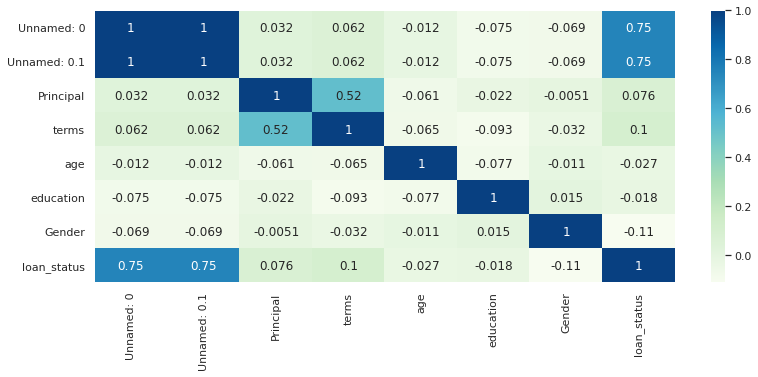

In [45]:
#Correlation Heatmap
corr_mat = df_1_scaled.corr()

plt.figure(figsize = (13,5))
sns_plot = sns.heatmap(data = corr_mat, annot = True, cmap='GnBu')
plt.show()

We can see that "Unnamed: 0" and "Unnamed: 0.1" features are highly correlated to "loan_status" and "age" and "education" are the least correlated to "loan_status".

## Train-Test Split

In [46]:
#create a dataframe with all training data except the target column
X = df_1_scaled.drop(columns=['loan_status'])
#check that the target variable has been removed
X.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age,education,Gender
0,-1.753516,-1.753516,0.515785,0.920718,2.331526,0,0
1,-1.736168,-1.736168,0.515785,0.920718,0.341701,1,1
2,-1.727495,-1.727495,0.515785,-0.959111,-0.653211,2,0
3,-1.718821,-1.718821,0.515785,0.920718,-0.487392,2,1
4,-1.701474,-1.701474,0.515785,0.920718,-0.321573,2,0


In [47]:
#separate target values
y = df_1_scaled['loan_status'].values
#view target values
y[0:5]

array([0, 0, 0, 0, 0])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

‘train_test_split’ takes in 5 parameters. The first two parameters are the input and target data we split up earlier. Next, we will set ‘test_size’ to 0.33. This means that 33% of all the data will be used for testing, which leaves 67% of the data as training data for the model to learn from. Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results. </br> </br>

Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. For example, in our dataset, if 25% of loan applications have 'PAIDOFF' and 75% have 'COLLECTION', setting ‘stratify’ to y will ensure that the random split has 25% of loan applications with 'PAIDOFF' and 75% of loan applications with 'COLLECTION'.

In [50]:
X_train.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age,education,Gender
207,0.345489,0.345489,-1.314589,-0.959111,0.839157,1,0
174,0.033240,0.033240,0.515785,0.920718,-0.819029,2,0
81,-0.877485,-0.877485,-1.314589,-0.959111,1.170795,2,0
302,1.308256,1.308256,0.515785,0.920718,1.668251,0,0
6,-1.684127,-1.684127,0.515785,0.920718,-0.487392,2,0


## Modeling

## k-Nearest Neighbour (KNN)

In [51]:
import math
math.sqrt(len(X_test))

10.723805294763608

Result is 10, so we can use 9 or 11 for K. Hence I will use 11.

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knnmodel = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean') #p is 2 cuz we are looking for 'PAIDOFF' or 'COLLECTION': 2 results

In [54]:
#Fit Model
knnmodel.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [55]:
#predict the test set results
yhat_knn = knnmodel.predict(X_test)
print(yhat_knn)

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1]


### Accuracy Evaluation

In [56]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knnmodel.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.961038961038961
Test set Accuracy:  0.9217391304347826


In [57]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knnmodel_2 = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn2=knnmodel_2.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn2)

    
    std_acc[n-1]=np.std(yhat_knn2==y_test)/np.sqrt(yhat_knn2.shape[0])

mean_acc

array([0.93913043, 0.92173913, 0.94782609, 0.91304348, 0.93043478,
       0.91304348, 0.93913043, 0.92173913, 0.91304348, 0.91304348,
       0.92173913, 0.91304348, 0.92173913, 0.89565217])

Plot model accuracy for Different number of Neighbors

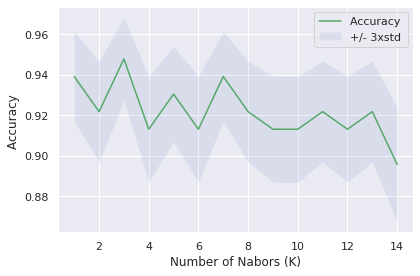

In [58]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

Since we see k=3 produces the best accuracy. Let's use k=3 for the model again.

In [59]:
knnmodel = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean') #p is 2 cuz we are looking for 'PAIDOFF' or 'COLLECTION': 2 results

In [60]:
#Fit Model
knnmodel.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [61]:
#predict the test set results
yhat_knn = knnmodel.predict(X_test)
print(yhat_knn)

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1]


In [62]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knnmodel.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.9826839826839827
Test set Accuracy:  0.9478260869565217


In [63]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat_knn)

0.8064516129032258

In [64]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_knn)

0.8928571428571429

In [65]:
from sklearn.metrics import log_loss
yhat_knnprob = knnmodel.predict_proba(X_test)
log_loss(y_test, yhat_knnprob)

0.6882479431131149

## Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [67]:
loanTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [68]:
yhat_tree = loanTree.predict(X_test)

In [69]:
print (yhat_tree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 1 0 0 0]


### Accuracy Evaluation

In [70]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

DecisionTrees's Accuracy:  0.991304347826087


In [71]:
jaccard_score(y_test, yhat_tree)

0.9655172413793104

In [72]:
f1_score(y_test, yhat_tree)

0.9824561403508771

In [73]:
yhat_treeprob = loanTree.predict_proba(X_test)
log_loss(y_test, yhat_treeprob)

0.3003371860427025

## Support Vector Machine (SVM)

In [74]:
from sklearn import svm

In [75]:
loanSVM = svm.SVC(kernel='rbf')

In [76]:
loanSVM.fit(X_train, y_train)

SVC()

In [77]:
yhat_svm = loanSVM.predict(X_test)

In [78]:
print (yhat_svm [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 1 0 0 0]


### Accuracy Evaluation

In [79]:
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat_svm))

SVM's Accuracy:  0.9739130434782609


In [80]:
jaccard_score(y_test, yhat_svm)

0.896551724137931

In [81]:
f1_score(y_test, yhat_svm)

0.9454545454545454

## Logistics Regression

In [82]:
from sklearn.linear_model import LogisticRegression
lregressionmodel = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lregressionmodel

LogisticRegression(C=0.01, solver='liblinear')

In [83]:
yhat_lregression = lregressionmodel.predict(X_test)

In [84]:
print (yhat_lregression [0:5])
print (y_test [0:5])

[0 0 0 0 1]
[0 1 0 0 0]


### Accuracy Evaluation

In [85]:
print("Logistics Regression's Accuracy: ", metrics.accuracy_score(y_test, yhat_lregression))

Logistics Regression's Accuracy:  0.9130434782608695


In [86]:
jaccard_score(y_test, yhat_lregression)

0.7222222222222222

In [87]:
f1_score(y_test, yhat_lregression)

0.8387096774193549

In [88]:
yhat_lregressionprob = lregressionmodel.predict_proba(X_test)
log_loss(y_test, yhat_lregressionprob)

0.4087264660150181

## Best Classifier

<b> Based on the evaluation results - Decision Tree is the best classifier for this use case. <b>